In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.animation as animation
import numpy as np

<span style="color:orange">

# **1a**

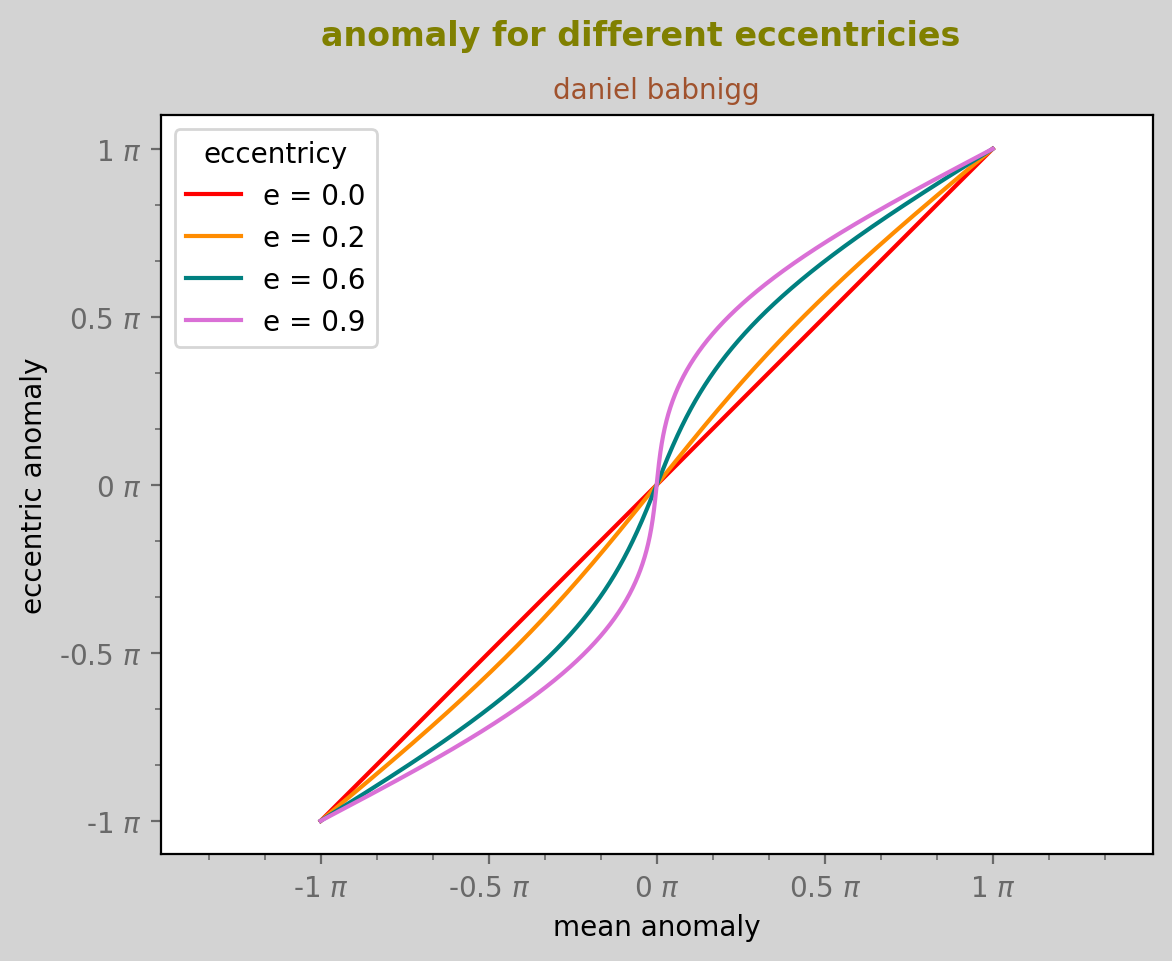

In [2]:
def mean_from_ecc(ecc_anomoly,ecc):
    return ecc_anomoly-ecc*np.sin(ecc_anomoly)
    
ecc_anomoly = np.linspace(-np.pi,np.pi,1000)

plt.figure(dpi=200).set_facecolor("lightgray")
plt.suptitle("anomaly for different eccentricies",weight="bold",color="olive")
plt.title("daniel babnigg",color="sienna",size=10)
plt.xlabel("mean anomaly")
plt.ylabel("eccentric anomaly")
plt.plot(mean_from_ecc(ecc_anomoly,0.0)/np.pi,ecc_anomoly/np.pi,label="e = 0.0",color="red")
plt.plot(mean_from_ecc(ecc_anomoly,0.2)/np.pi,ecc_anomoly/np.pi,label="e = 0.2",color="darkorange")
plt.plot(mean_from_ecc(ecc_anomoly,0.6)/np.pi,ecc_anomoly/np.pi,label="e = 0.6",color="teal")
plt.plot(mean_from_ecc(ecc_anomoly,0.9)/np.pi,ecc_anomoly/np.pi,label="e = 0.9",color="orchid")
plt.tick_params(colors='dimgrey', which='both')
plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.gca().xaxis.set_major_locator(tck.MultipleLocator(base=1/2))
plt.gca().xaxis.set_minor_locator(tck.MultipleLocator(base=1/6))
plt.gca().yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.gca().yaxis.set_major_locator(tck.MultipleLocator(base=1/2))
plt.gca().yaxis.set_minor_locator(tck.MultipleLocator(base=1/6))
plt.legend(title="eccentricy")
plt.axis("equal")
plt.savefig("1a.png",dpi=400,bbox_inches='tight',pad_inches=0.1)
plt.show()

<span style="color:orange">

# **1b**

In [3]:
# newton-raphson method
# fixed e,M
def newton_raphson(f, df, x0, tol):
    x0s.append(x0[0])
    if abs(f(*x0)) < tol:
        return x0[0]
    else:
        return newton_raphson(f, df, [x0[0] - f(*x0)/df(*x0),x0[1],x0[2]], tol)

# M = E-e*sin(E) -> 0 = E-e*sin(E)-M
def f(E,e,M):
    return E-e*np.sin(E)-M
def df(E,e,M):
    return 1-e*np.cos(E)

In [4]:
x0s = []
E_guess = [0,0.9,0.95]
E_best = newton_raphson(f,df,E_guess,1e-12)
print(f"M = 0.95\nbest E = {E_best:.5f}\nM from best E = {E_best-0.9*np.sin(E_best):.5f}")

M = 0.95
best E = 1.82180
M from best E = 0.95000


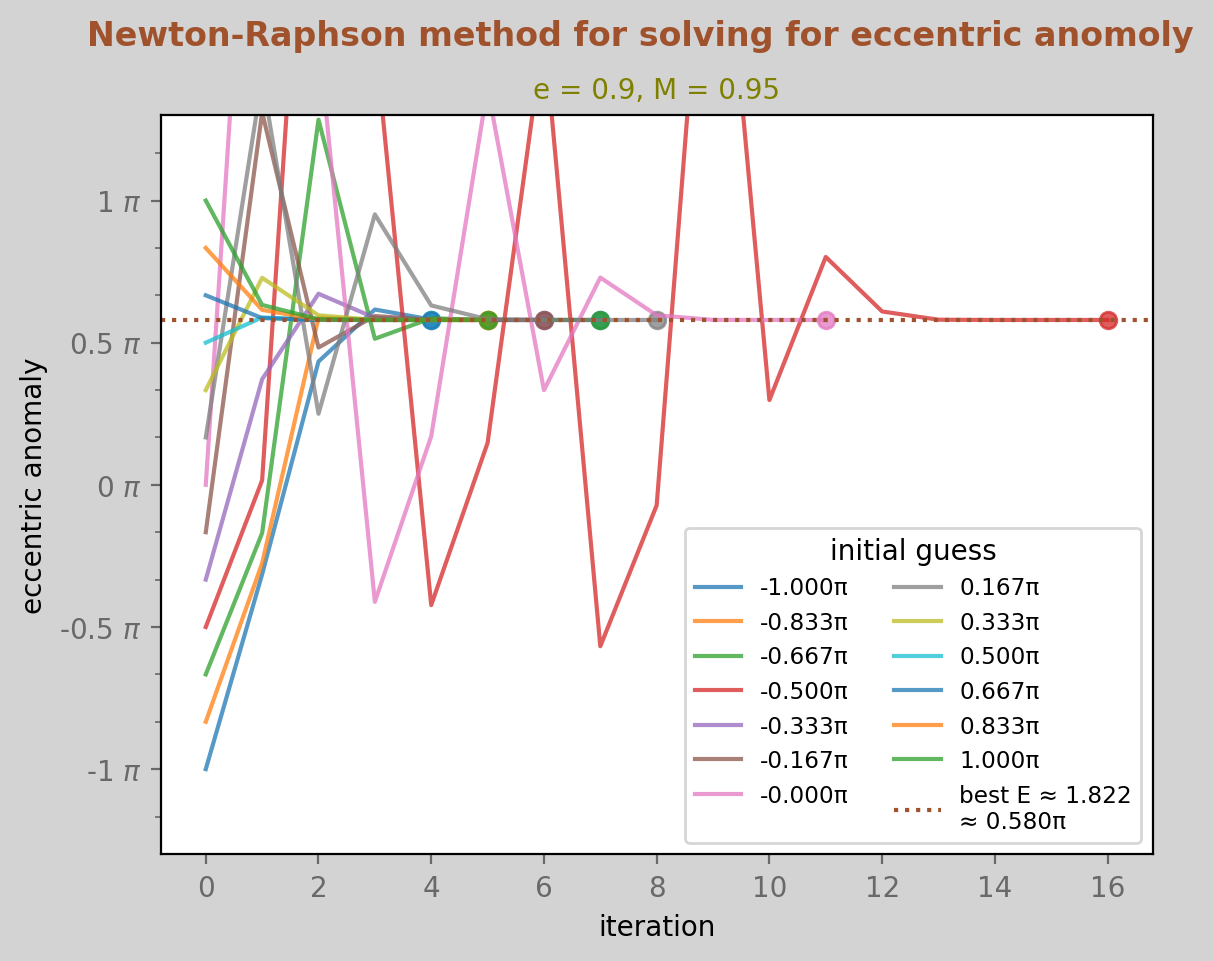

In [5]:
plt.figure(dpi=200).set_facecolor("lightgray")
plt.suptitle("Newton-Raphson method for solving for eccentric anomoly",weight="bold",color="sienna")
plt.title("e = 0.9, M = 0.95",color="olive",size=10)
plt.xlabel("iteration")
plt.ylabel("eccentric anomaly")
E_guesses = np.arange(-np.pi,np.pi+1e-9,2*np.pi/12)
for i in E_guesses:
    x0s = []
    E_guess = [i,0.9,0.95]
    E_best = newton_raphson(f,df,E_guess,1e-12)
    plt.plot(np.arange(len(x0s)),np.array(x0s)/np.pi,label=f"{i/np.pi:.3f}π",alpha=0.75)
    plt.scatter(len(x0s)-1,x0s[-1]/np.pi,alpha=0.75)
plt.ylim(-1.3,1.3)
plt.axhline(E_best/np.pi,color="sienna",ls=":",label=f"best E ≈ {E_best:.3f}\n≈ {E_best/np.pi:.3f}π")
plt.gca().yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.gca().yaxis.set_major_locator(tck.MultipleLocator(base=1/2))
plt.gca().yaxis.set_minor_locator(tck.MultipleLocator(base=1/6))
plt.legend(title="initial guess",ncols=2,fontsize="small")
plt.tick_params(colors='dimgrey', which='both')
plt.savefig("1b.png",dpi=400,bbox_inches='tight',pad_inches=0.1)
plt.show()

<span style="color:orange">

# **1c**

In [6]:
def get_xy(a,b,E,e):
    return a*(np.cos(E)-e),b*np.sin(E)

In [7]:
# semi-major axis a = 1
a = 1.0
e = [0.0,0.2,0.6,0.9]
# choice of T is insignificant
T = 1.0
# t0 = 0 -> closest approach is +x axis
t0 = 0
# intervals separated by T/20
t = np.linspace(0,T,20)
M = 2*np.pi/T*(t-t0)
b = []
E = []

# for each e, iterate through M's, solving for best E
# at certain e and M
# also, calculate semi-minor axis with a and given e
for i,e_ in enumerate(e):
    b.append(a*(1-e[i]**2)**0.5)
    for j,t_ in enumerate(t):
        E.append(newton_raphson(f,df,[0,e[i],M[j]],1e-12))
E = np.array(E).reshape((len(e),len(M)))


# now, higher detail (since easy to do!)
t_ = np.linspace(0,T,1000)
M_ = 2*np.pi/T*(t_-t0)
E_ = []

# for each e, iterate through M's, solving for best E
# at certain e and M
# also, calculate semi-minor axis with a and given e
for i,e_ in enumerate(e):
    for j,t__ in enumerate(t_):
        E_.append(newton_raphson(f,df,[np.pi,e[i],M_[j]],1e-12))
E_ = np.array(E_).reshape((len(e),len(M_)))

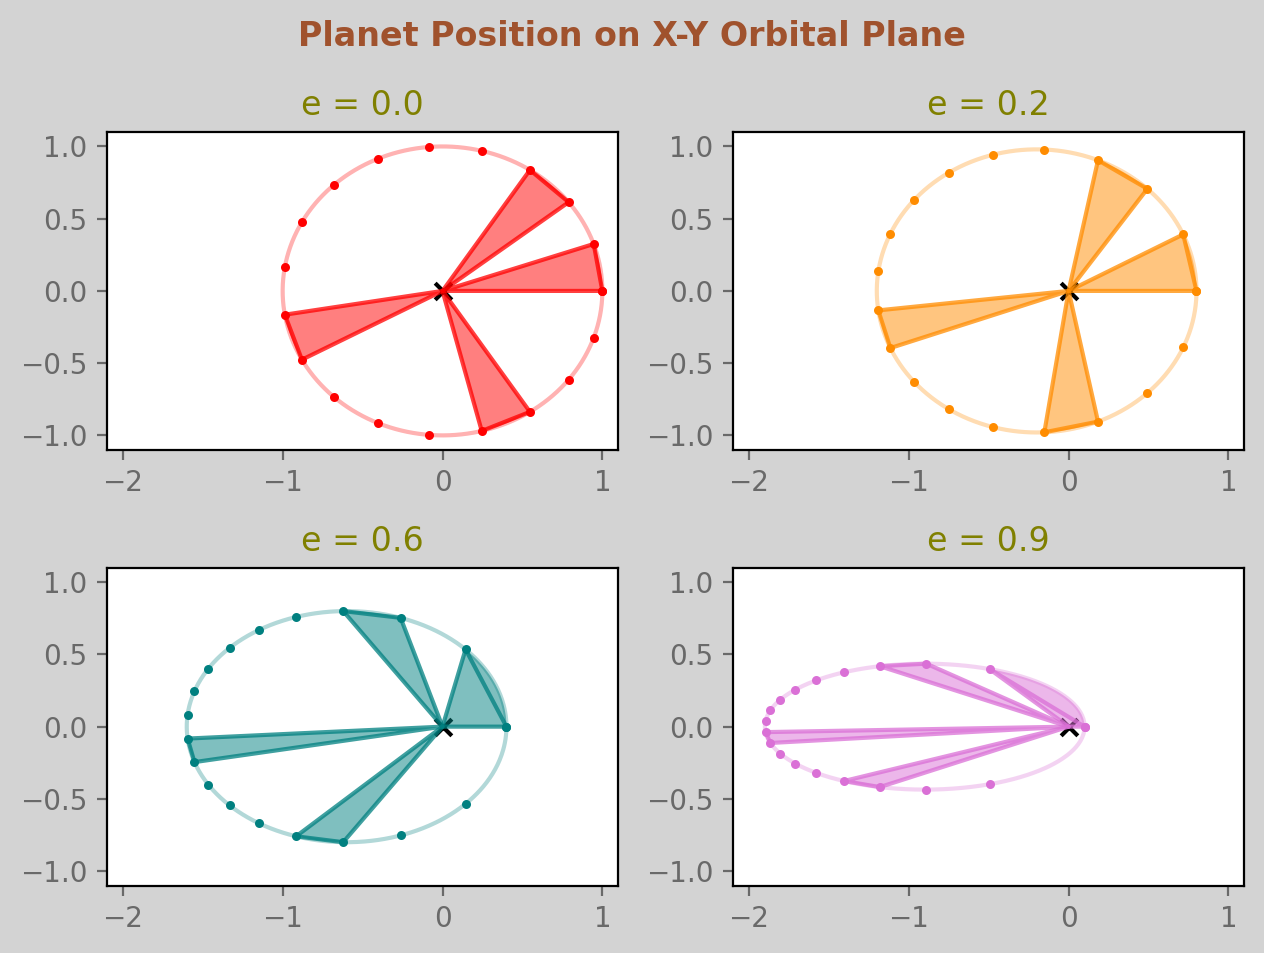

In [8]:
# for each e, plot x & y's for given t's
# & plot some areas

plt.figure(dpi=200).set_facecolor("lightgray")
plt.suptitle("Planet Position on X-Y Orbital Plane",weight="bold",color="sienna")

colors = ["red","darkorange","teal","orchid"]
for i,e_ in enumerate(e):
    plt.subplot(2,2,i+1)
    plt.title(f"e = {e_}",color="olive")
    plt.scatter(0,0,c="black",marker="x")
    
    x,y = get_xy(a,b[i],E[i],e[i])
    plt.scatter(x,y,color=colors[i],s=5)
    
    x_,y_ = get_xy(a,b[i],E_[i],e[i])
    plt.plot(x_,y_,color=colors[i],alpha=0.3)

    for j in [0,2,10,15]:
        x__,y__ = get_xy(a,b[i],E[i,j:j+2],e[i])
        x__ = np.append(x__,[0,x__[0]])
        y__ = np.append(y__,[0,y__[0]])
        plt.plot(x__,y__,color=colors[i],alpha=0.75)

    # this fills the area a little better
    for j in [0,2,10,15]:
        min,max = t[j:j+2]
        t_ = np.linspace(min,max,50)
        M_ = 2*np.pi/T*(t_-t0)
        E__ = []
        for k,t__ in enumerate(t_):
            E__.append(newton_raphson(f,df,[0,e[i],M_[k]],1e-12))
        x__,y__ = get_xy(a,b[i],E__,e[i])
        x__ = np.append(x__,0)
        y__ = np.append(y__,0)
        plt.fill(x__,y__,color=colors[i],alpha=0.5,edgecolor='none')

    plt.xlim(-2.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.tick_params(colors='dimgrey',which='both')
plt.tight_layout(pad=1)
plt.savefig("1c.png",dpi=400,bbox_inches='tight',pad_inches=0.1)
plt.show()

<span style="color:orange">

# **animation**

In [9]:
iter = 300
t = np.linspace(0,T,iter)
M_ = 2*np.pi/T*(t-t0)
E__ = []
for i,e_ in enumerate(e):
    for k,t__ in enumerate(t):
        # print(e_,t__)
        E__.append(newton_raphson(f,df,[np.pi,e[i],M_[k]],1e-12))
E__ = np.array(E__).reshape((len(e),len(M_)))

MovieWriter ffmpeg unavailable; using Pillow instead.


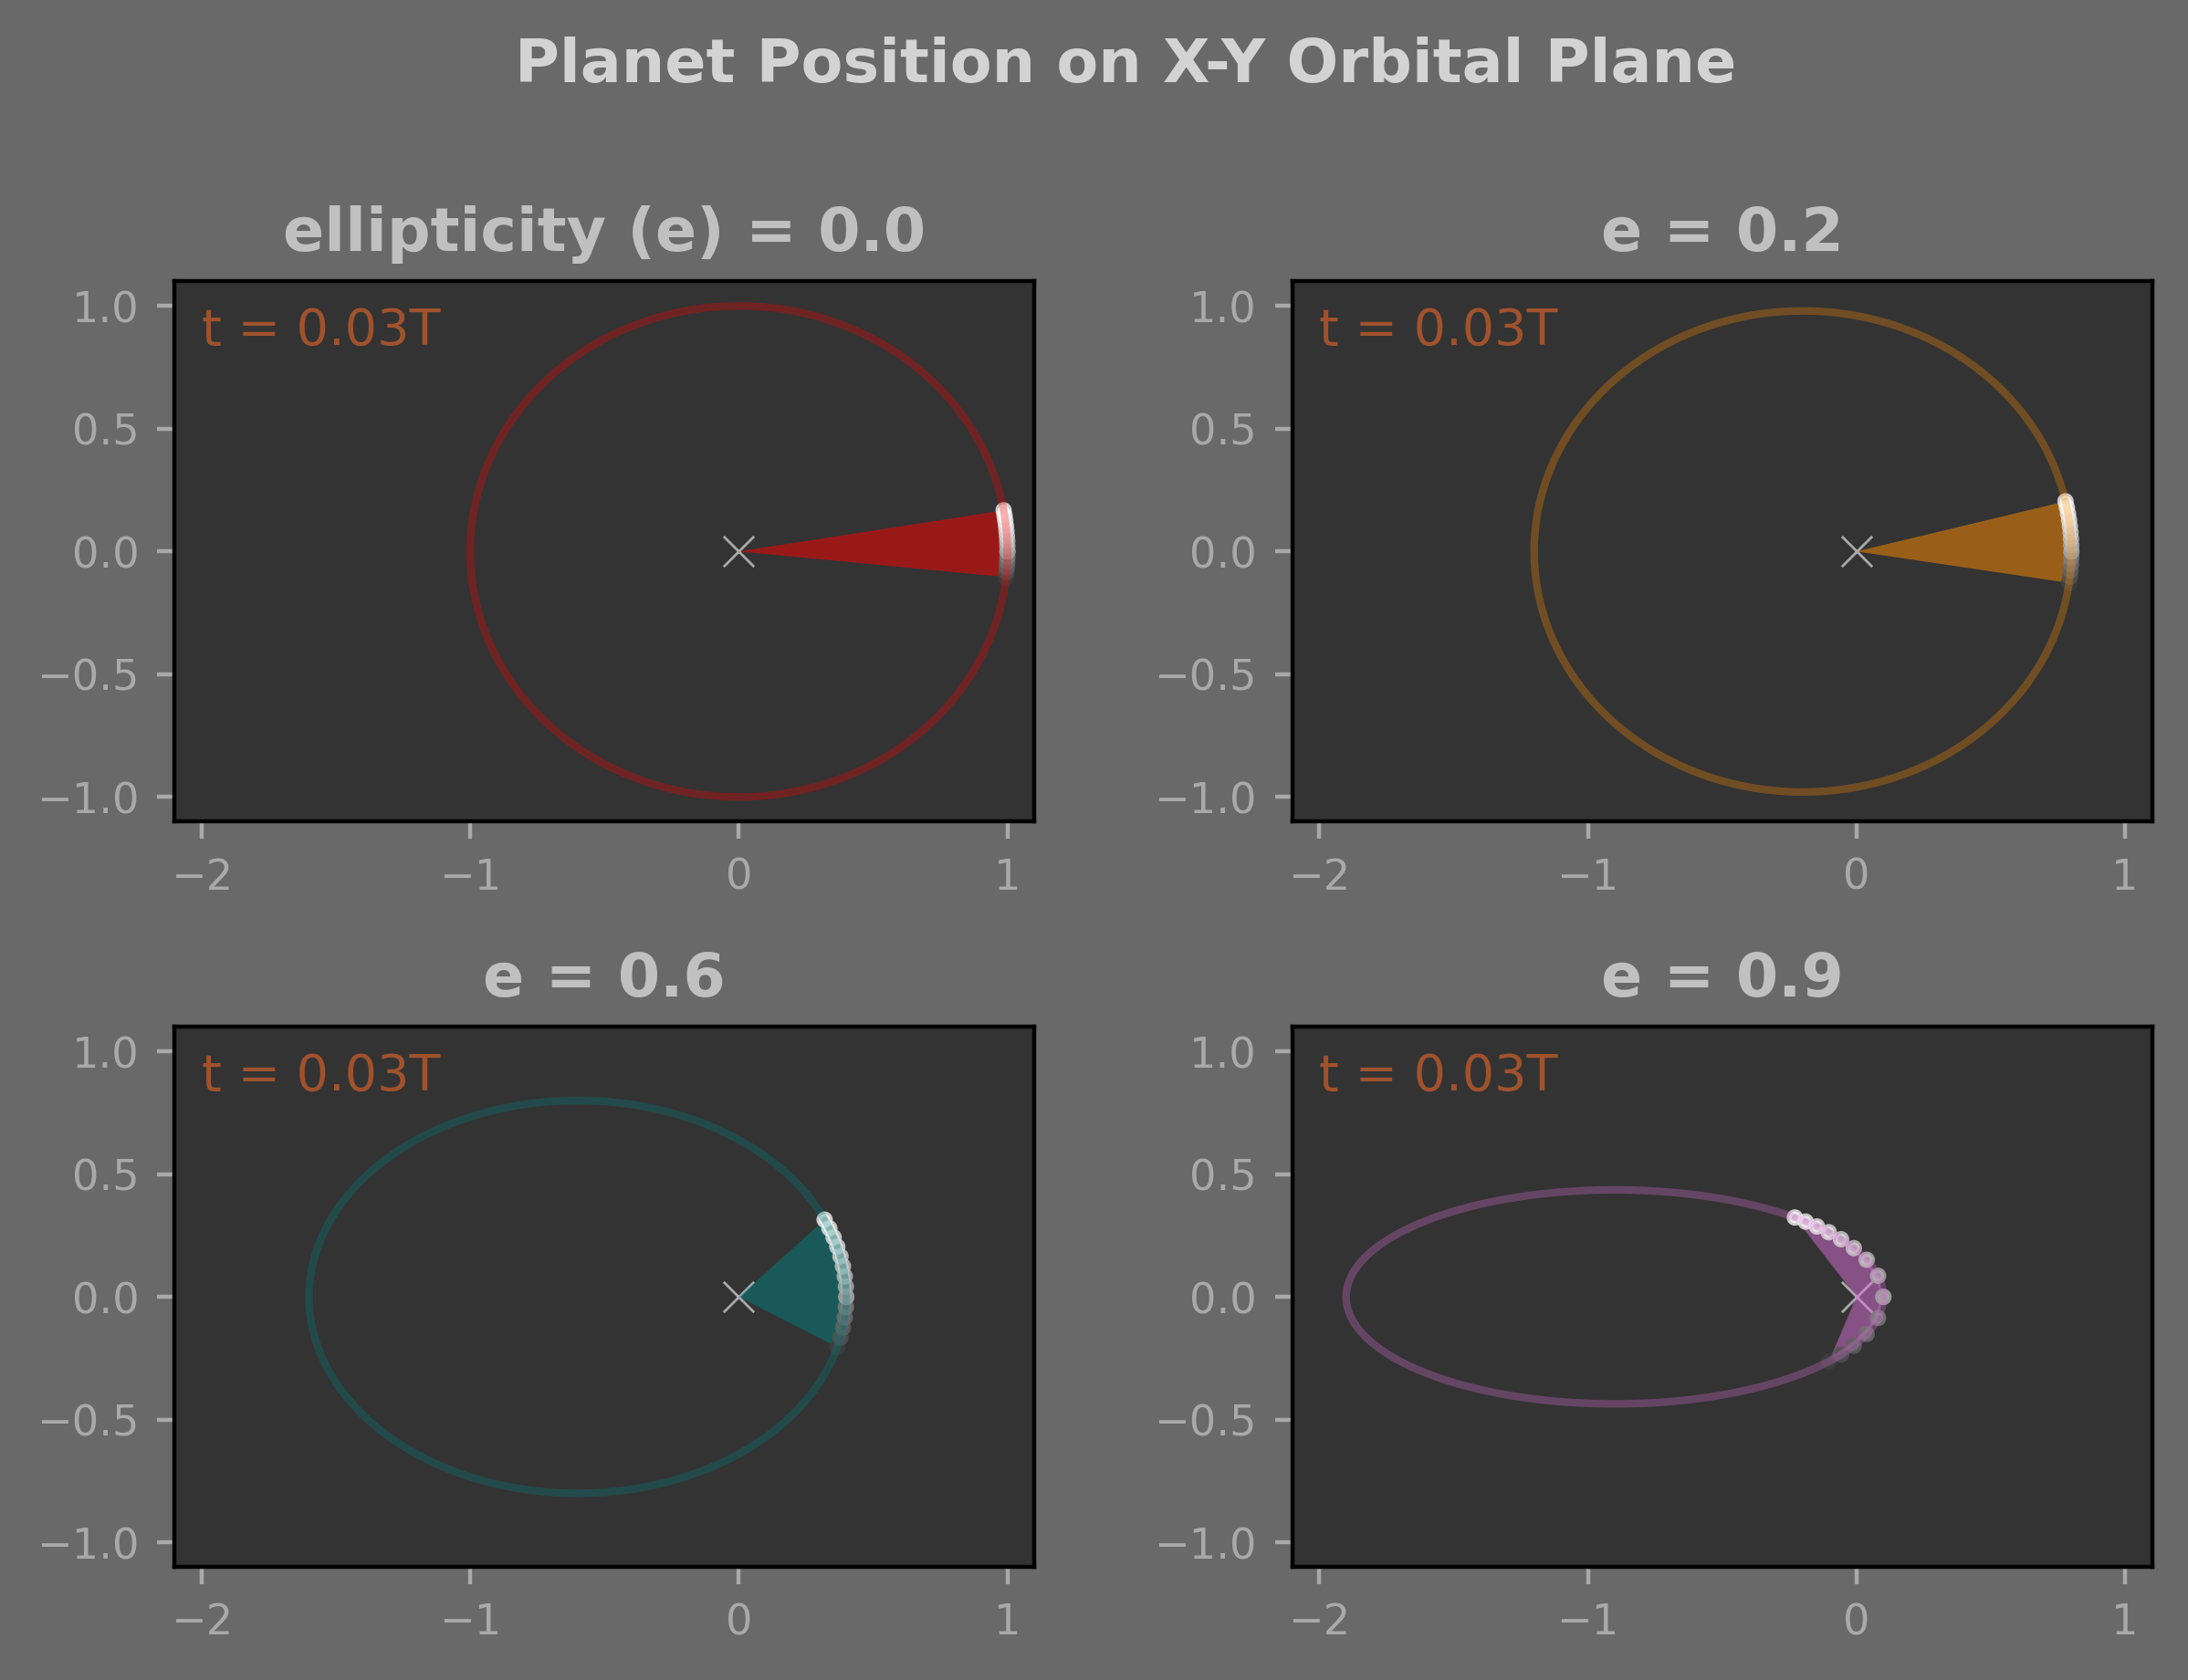

In [10]:
fig,axs = plt.subplots(2,2,dpi=400)
fig.set_facecolor("dimgray")
fig.suptitle(f"Planet Position on X-Y Orbital Plane",weight="bold",color="lightgray")

colors = ["red","darkorange","teal","orchid"]
mult = 3

def init():
    pass

def update_(j):
    print(f"{j}/{iter//mult}",end='\r')
    for i,e_ in enumerate(e):
        coords = (i//2,i%2)
        ax = axs[coords]
        ax.clear()
        ax.set_facecolor("#333333")
        t_for_title = t.take(np.arange(mult*j,mult*j+t.size//20),mode="wrap")[-1]
        if i==0:
            ax.set_title(f"ellipticity (e) = {e_}",color="silver",weight="bold")
        else:
            ax.set_title(f"e = {e_}",color="silver",weight="bold")
        ax.annotate(f"t = {t_for_title:.2f}T",xy=(-2,1),ha="left",va="top",color="sienna")
        ax.scatter(0,0,c="darkgray",marker="x",lw=0.5)

        x_,y_ = get_xy(a,b[i],E_[i],e[i])
        ax.plot(x_,y_,color=colors[i],alpha=0.3)
        
        E___ = E__[i].take(np.arange(mult*j,mult*j+t.size//20),mode="wrap")
        x__,y__ = get_xy(a,b[i],E___,e[i])
        x__ = np.append(x__,0)
        y__ = np.append(y__,0)
        
        ax.fill(x__,y__,color=colors[i],alpha=0.5,edgecolor='none')
        ax.scatter(x__[:-1],y__[:-1],c=plt.get_cmap("Greys_r")(np.linspace(0,1,len(x__)-1)*.8+.2),s=5,marker="o",alpha=0.75)
        
        ax.set_xlim(-2.1,1.1)
        ax.set_ylim(-1.1,1.1)
        ax.tick_params(colors='darkgray',which='both',labelsize="small")
        
    return fig,ax

fig.tight_layout(pad=2)

anim_ = animation.FuncAnimation(fig=fig,func=update_,frames=(iter//3-1),interval=2,init_func=init,repeat=True,blit=False)
anim_.save("animated.gif",fps=60)

---